# Прикладные дифференциальные уравнения
## Домашнее задание №1


*Илья Щуров*

Факультет компьютерных наук, Прикладная математики и информатика, 2021-22 учебный год

[Страница курса](http://math-info.hse.ru/2021-22/Прикладные_дифференциальные_уравнения)

Задание выполнил(а): 

> Гриша Буклей



Задание выполняется самостоятельно. Вам запрещено смотреть в чужое решение до сдачи работы или давать своё решения для прочтения кому-либо, а также совершать эквивалентные действия — например, обсуждать решения устно, если в результате такого обсуждения тексты работ могут оказаться настолько сходными, чтобы вызвать подозрения в несамостоятельном решении.

В случае сдачи работы после срока сдачи оценка будет вычисляться как решение дифференциального уравнения $\dot x = -x$ с начальным условием $x(0)=x_0$, где $x_0$ — оценка, которую вы получили бы за работу, если бы сдали её в срок; время измеряется в днях, но течёт непрерывно, округлений нет.

In [2]:
import numpy as np

In [3]:
def euler(f, t0, x0, T, steps):
    """
    Решает уравнение \dot x = f(t, x) с начальным условием
    x(t0) = x0
    
    Возвращает np.array([[t0, x0], [t1, x1], ..., [t_steps, x_steps]]),
    где t_steps == T
    """
    points = [[t0, x0]]
    x = x0
    delta_t = (T - t0) / steps
    for i in range(steps):
        t = t0 + delta_t * (i + 1)
        x = x + delta_t * f(t, x)
        points.append([t, x])
    return np.array(points)


def x_identity(t, x):
    return x

### Задача 1
Изучите с помощью компьютерной симуляции, как зависит ошибка метода Эйлера от длины шага $\Delta t = (T-t_0) / N$, где $N$ — количество шагов? Возьмите уравнение с известным решением (например, $\dot x = x$) и для какого-то фиксированного начального условия и фиксированного $T$ найдите точное решение $x(T)$ и его приближение $x_{Euler}(t; N)$ для $N$ шагов. Постройте график $|x(T) - x_{Euler}(t; N)|$ как функции от $N$ при больших $N$. Умножьте ошибку на $N$ и на $N^2$ и постройте графики получающихся функций. Возьмите логарифм ошибки и поделите его на логарифм $N$, постройте график этой функции при больших $N$. Сделайте вывод о скорости уменьшения ошибки в терминах $O$-больших или $\Theta$ от $N$ и $\Delta t$.

Возьмём уравнение $\dot x = x$. Его решение -- это функции вида $C e^x$. Пусть дополнительно известно, что $x(0) = 1$. Тогда $C = 1$. Значит, решение -- $e^x$. Построим график $|x(T) - x_{Euler}(t; N)|$ как функции от $N$ при $N \in [100, 1000]$.

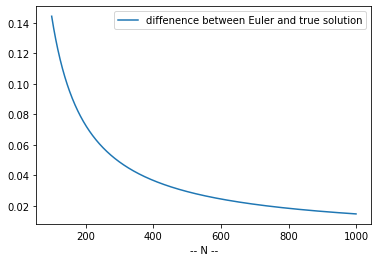

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

t0 = 0
x0 = 1
T = 2

N = np.arange(100, 1000)
error = []

for n in N:
  last_dot = euler(x_identity, t0, x0, T, n)[-1][1]
  error.append(abs(last_dot - np.exp(T)))
error = np.array(error)

plt.plot(N, error, label="diffenence between Euler and true solution")
plt.xlabel("-- N --")
plt.legend()

Да, видно, что ошибка убывает, убывает к нулю, но не очень понятно с какой скоростью  \

Теперь домножим ошибку на $N$ и $N^2$, чтобы оценить скорость её убывания 



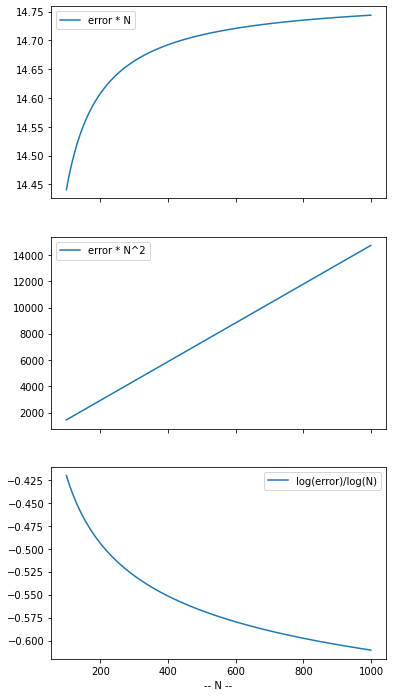

In [5]:
error_n = error*N
error_n_sq = error*(N**2)
log_error_log_n = np.log(error) / np.log(N)

fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

axs[0].plot(N, error_n, label="error * N")
axs[1].plot(N, error_n_sq, label="error * N^2")
axs[2].plot(N, log_error_log_n, label="log(error)/log(N)")
plt.xlabel("-- N --")
axs[0].legend()
axs[1].legend()
axs[2].legend()

Из первой и последней картинки видно, что сходимость кажется есть. А вторая подтверждает эту гипотезу, видно, что ошибка принадлежит классу $O(1/N) = O(\Delta t)$ функций. Тут сложно сказать что-то про $\Theta$, потому что иногда ошибка может быть совсем нулевой и там никакой $\Theta$ конечно не будет

### Задача 2
Модифицируйте функцию `euler_multidim` таким образом, чтобы она обрабатывала случай `T < t_0`.

вообще фукнция и так работает... за счёт того, что там $delta$ получается меньше 0, то мы как бы делаем шаг назад

In [6]:
def euler_multidim(f, t0, x0, T, steps):
    """
    Решает уравнение \dot x = f(t, x) с начальным условием
    x(t0) = x0
    
    Возвращает tpoints, xpoints
    tpoints == [t0, t1, ..., t_steps],
    xpoints == [x0, x1, ..., x_steps]
    где t_steps == T
    """
    tpoints = [t0]
    xpoints = [x0]
    x = x0
    
    delta_t = (T - t0) / steps
    for i in range(steps):
        t = t0 + delta_t * (i + 1) 
        x = x + delta_t * f(t, x)
        tpoints.append(t)
        xpoints.append(x)
    return np.array(tpoints), np.array(xpoints)

Пример работы:

In [7]:
def lotka_volterra(t, x):
    rabbits, foxes = x
    return np.array([rabbits - foxes * rabbits, -foxes + foxes * rabbits])

In [8]:
t, x = euler_multidim(lotka_volterra, 15, np.array([0.2, 0.2]), 0, 5000)
import plotly.graph_objects as go
go.Figure(
    go.Scatter3d(x=t, y=x[:, 0], z=x[:, 1], mode="lines"),
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="time"),
            yaxis=dict(title="rabbits"),
            zaxis=dict(title="foxes"),
        ),
    ),
)

### Задача 3
Найдите все положения равновесия в модели Лотки — Вольтерры. Покажите, что существует единственное положение равновесия в области $x>0$, $y>0$. Изучите с помощью компьютерных экспериментов, как ведут себя решения вблизи этого положения равновесия и вдалеке от него. Является ли на ваш взгляд это положение равновесия устойчивым? Объясните, почему. В каких случаях решения похожи на решения уравнения осциллятора (близки к гармоническим колебаниям)? В каких случаях не похожи? Зависит ли период от выбора начального условия? Как вы думаете, как объясняются эти результаты?

Точка будет положением равновесия титт,к произведные по обеим координатам равны 0. Наша система иммет вид:

$\begin{cases}
\dot x = x - xy = 0 \\ 
\dot y = -y + xy = 0
\end{cases} 
\Leftrightarrow
\begin{cases}
x(1 - y) = 0 \\ 
y(1 - x) = 0
\end{cases}
\Leftrightarrow
\left[
  \begin{array}{ccc}
    \begin{cases}
      x = 0 \\
      y = 0 \\
    \end{cases} \\
    \begin{cases}
      x = 1 \\
      y = 1 \\
    \end{cases}
  \end{array}
\right. $

случай (0, 0) не интересен с прикладной точки зрения, единственное положение равновесия при $x > 0, y > 0$ -- это точка (1, 1)

In [9]:
### FROM: https://stackoverflow.com/a/27666700/3025981

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: Line2D object as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if not isinstance(line, mlines.Line2D):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line.get_xdata(), line.get_ydata()

    arrow_kw = {
        "arrowstyle": arrowstyle,
        "mutation_scale": 10 * arrowsize,
    }

    color = line.get_color()
    use_multicolor_lines = isinstance(color, np.ndarray)
    if use_multicolor_lines:
        raise NotImplementedError("multicolor lines not supported")
    else:
        arrow_kw['color'] = color

    linewidth = line.get_linewidth()
    if isinstance(linewidth, np.ndarray):
        raise NotImplementedError("multiwidth lines not supported")
    else:
        arrow_kw['linewidth'] = linewidth

    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows
### END FROM

Text(0, 0.5, 'foxes')

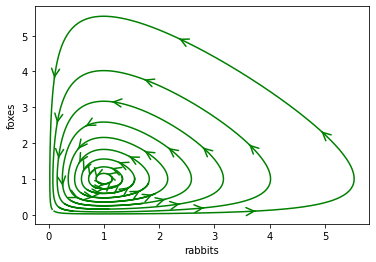

In [10]:
ax = plt.gca()

for start in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  t, x = euler_multidim(lotka_volterra, 0, np.array([start, start]), 9, 5000)
  line, = plt.plot(x[:, 0], x[:, 1], color='green')
  add_arrow_to_line2D(ax, line, arrowsize=2, arrowstyle='->')

plt.xlabel("rabbits")
plt.ylabel("foxes")

Text(0, 0.5, 'foxes')

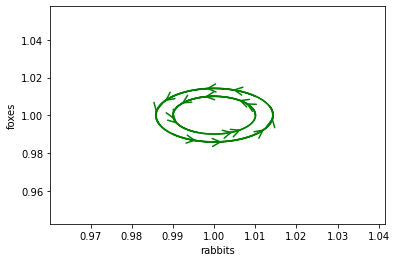

In [14]:
ax = plt.gca()

for start in [np.array([1.01, 1]),
              np.array([1, 1.01]),
              np.array([1.01, 1.01]),
              np.array([0.99, 0.99])]:
  t, x = euler_multidim(lotka_volterra, 0, start, 9, 5000)
  line, = plt.plot(x[:, 0], x[:, 1], color='green')
  add_arrow_to_line2D(ax, line, arrowsize=2, arrowstyle='->')

plt.xlabel("rabbits")
plt.ylabel("foxes")

Изучите с помощью компьютерных экспериментов, как ведут себя решения вблизи этого положения равновесия и вдалеке от него

> в первом приближении похожи на замкнутый контур, двужутся против числовой стрелки вокруг почти равновесия

Является ли на ваш взгляд это положение равновесия устойчивым?

> c устойчивостью сложнее. В засимости от двух разных начальный положений, интегральная кривая либо раскручивается либо закручивается (следующие две картинки). Видимо, дело в ошибке вычислений. На самом деле эти траектории закнуты и поэтому положение устойчиво (если мы отступим немного от точки равносия и потом пройдём сколько-то по интегральной кривой, то мы не улетим слишком далеко)

Text(0, 0.5, 'foxes')

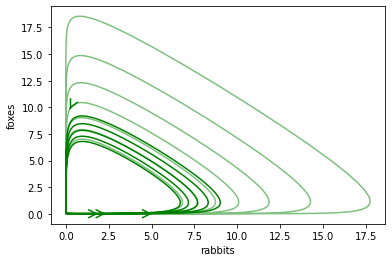

In [11]:
ax = plt.gca()

t, x = euler_multidim(lotka_volterra, 0, np.array([0.01, 1]), 60, 5000)
line, = plt.plot(x[:, 0], x[:, 1], color='green')
t, x = euler_multidim(lotka_volterra, 0, np.array([0.01, 1]), 100, 5000)
line, = plt.plot(x[:, 0], x[:, 1], color='green', alpha=0.5)
add_arrow_to_line2D(ax, line, arrowsize=2, arrowstyle='->')

plt.xlabel("rabbits")
plt.ylabel("foxes")

Text(0, 0.5, 'foxes')

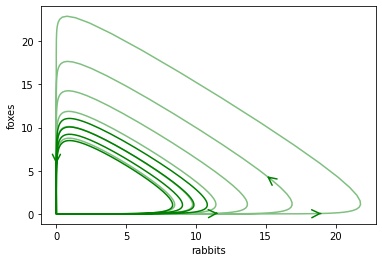

In [49]:
ax = plt.gca()

t, x = euler_multidim(lotka_volterra, 0, np.array([0.1, 0.01]), 60, 5000)
line, = plt.plot(x[:, 0], x[:, 1], color='green')
t, x = euler_multidim(lotka_volterra, 0, np.array([0.1, 0.01]), 100, 5000)
line, = plt.plot(x[:, 0], x[:, 1], color='green', alpha=0.5)
add_arrow_to_line2D(ax, line, arrowsize=2, arrowstyle='->')

plt.xlabel("rabbits")
plt.ylabel("foxes")

В каких случаях решения похожи на решения уравнения осциллятора (близки к гармоническим колебаниям)? В каких случаях не похожи?

> из приведённых ниже 4-х графиков можно предположить, что больше всего на осцеллятор похожи решения в том случае, если начальная точка близка к положению равновесия. Этому можно дать такое объяснение: близ точки равновесия в модели Лотки-Вольтерра интегральные кривые похожи на окружности  (как и в осцилляторе), что можно видеть на картинках выше, поэтому и колебания получаются похожими на гармонические.



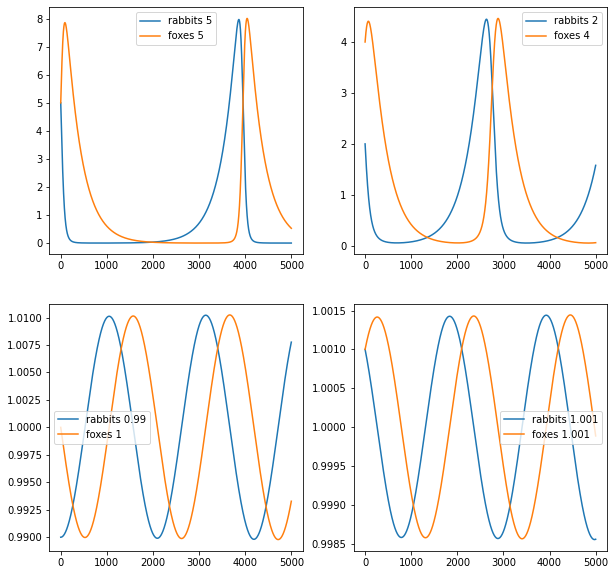

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

t, x = euler_multidim(lotka_volterra, 0, np.array([5, 5]), 15, 5000)
axs[0][0].plot(x[:, 0], label="rabbits 5")
axs[0][0].plot(x[:, 1], label="foxes 5")
axs[0][0].legend()

t, x = euler_multidim(lotka_volterra, 0, np.array([2, 4]), 15, 5000)
axs[0][1].plot(x[:, 0], label="rabbits 2")
axs[0][1].plot(x[:, 1], label="foxes 4")
axs[0][1].legend()

t, x = euler_multidim(lotka_volterra, 0, np.array([0.99, 1]), 15, 5000)
axs[1][0].plot(x[:, 0], label="rabbits 0.99")
axs[1][0].plot(x[:, 1], label="foxes 1")
axs[1][0].legend()

t, x = euler_multidim(lotka_volterra, 0, np.array([1.001, 1.001]), 15, 5000)
axs[1][1].plot(x[:, 0], label="rabbits 1.001")
axs[1][1].plot(x[:, 1], label="foxes 1.001")
axs[1][1].legend()

Зависит ли период от выбора начального условия? Как вы думаете, как объясняются эти результаты?

> судя опять же по зелёным картинкам, все округлые траектории сделали один оборот за одинаковое время. Отсюда следует вывод, что период не зависит от начального условия. Жизненное объяснение этому можно дать достаточно логичное: такой цикл это как смена сезона, вне зависимость от того сколько сейчас существует волков, если их сильно больше чем зайцев, то они начнут умирать от голода с одинаковой скоростью итд. Математически-интуитивное этому объянение можно дать такое: если мы далеко от положения равновесия, то и двигать будем быстрее, потому что производные больше